# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces¶

# CallMeMaybe: telefonía virtual

# Contenido

1. [Link](#Link)

2. [Descripción del análisis](#Descripción-del-análisis)

3. [Descripción de los datos](#Descripción-de-los-datos)
    
4. [Preprocesamiento de datos](#Preprocesamiento-de-datos)

5. [Análisis exploratorio de datos](#Análisis-exploratorio-de-datos)

6. [Prueba de hipótesis](#Prueba-de-hipótesis)    

7. [Conclusiones](#Conclusiones)

## Link
<a id="Link"></a>

**Dashboard:** https://public.tableau.com/views/ProyectoFinal1_17299776240820/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

**Presentación:** https://drive.google.com/file/d/1Kx0aYMO9eUoN7pSgYi3Q4URiwU2Z0hQc/view?usp=drive_link

## Descripción del análisis 
<a id="Descripción del análisis"></a>

Este análisis realizado al servicio de telefonía virtual CallMaybe tiene la finalidad de desarrollar una función que servirá a los supervisores información acerca de los operadores, la información obtenida ayudara a conocer a los operadores menos eficaces, los puntos a considerar para saber si un operador es ineficaz son:

- Una gran cantidad de llamadas perdidas, estas pueden ser internas o externas.
- Un tiempo de espera prolongado para llamadas entrantes.
- Un número reducido de llamadas salientes.

Para conocer a los operadores menos eficaces se realizarán un análisis de los datos y se presentarán graficas comprobando la información obtenida. También se realizará una prueba de hipótesis estadísticas.

## Descripción de los datos
<a id="Descripción de los datos"></a>

In [41]:
# Importamos librerias
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [42]:
# Carga de datos 
data = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [43]:
# Información general del dataset data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [44]:
# Mostramos las 5 primeras filas
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


En general se pude observar que el dataset cuenta con 9 columnas y 53902 filas, otra observación importante es la vista de valores ausentes en las columnas "internal" y "opertator_id". Se observa la infromacón de los operadores y las operadoras de CallMeMaybe.

In [45]:
# Mostramos la información genaral del dataset clients
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [46]:
# Mostramos las 5 primeras filas clients
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


En general se pude observar que el dataset cuenta con 3 columnas y 732 filas, a simple vista no se observan valores ausentes. Se incluye información de los clientes de CallMeMaybe.

## Preprocesamiento de datos
<a id="Preprocesamiento de datos"></a>

**Valores ausentes**

In [47]:
# Buscamos valores ausentes data
data.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [48]:
# Buscamos valores ausentes clients
clients.isnull().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [49]:
# Reemplazamos los valores NaN en la columna operator_id con un número para identificarlo
data['operator_id'].fillna('800000', inplace=True)
# Verificamos que ya no existan valores ausentes
data['operator_id'].isna().sum()

0

In [50]:
# Mostamos los valores que tiene la columna internal para conocer cual el valor frecuente
data['internal'].value_counts()

False    47621
True      6164
Name: internal, dtype: int64

In [51]:
# Reemplazamos los valores NaN en la columna internal con el valor más frecuente
data['internal'].fillna('False', inplace=True)
# Verificamos que ya no existan valores ausentes
data['internal'].isna().sum()

0

Para el dataset data se encontraron valores ausentes en dos columnas "internal" y "operator_id", para la columna "interna" se buscó el valor frecuente que fue al que se le asigno los valores ausentes con esa variable, para la columna "operator_id" se optó por utilizar un número de id similar a los que incluía el dataset pero que se pueda identificar. Para el dataset clients no se encontraron valores ausentes.

**Valores duplicados**

In [52]:
# Buscamos valores duplicados data
data.duplicated().sum()

4900

In [53]:
# Eliminamos los datos duplicados data
data = data.drop_duplicates().reset_index(drop=True)
# Comprobamos que se eliminaras los datos duplicados
data.duplicated().sum()

0

In [54]:
# Buscamos valores duplicados clients
clients.duplicated().sum()

0

Se encontró un total de 4900 datos duplicados en el dataset data, los cuales se eliminaron, para así evitar errores en las métricas con las que se estará trabajando en este análisis. Para el dataset clients no se encontraron valores duplicados.

**Tipo de datos**

In [55]:
# Mostramos el tipo de datos data
data.dtypes

user_id                 int64
date                   object
direction              object
internal               object
operator_id            object
is_missed_call           bool
calls_count             int64
call_duration           int64
total_call_duration     int64
dtype: object

In [56]:
# Cambiamos el tipo de dato de la columna date
data['date'] = pd.to_datetime(data["date"], format='%Y-%m-%d')
print(data['date'].dtype)

datetime64[ns, pytz.FixedOffset(180)]


In [57]:
# Cambiamos el tipo de dato de la columna is_missed_call para trabajar de una mejor manera
data['is_missed_call'] = data['is_missed_call'].astype('bool')
print(data['is_missed_call'].dtype)

bool


In [58]:
# Cambiamos el tipo de dato de la columna internal para trabajar de una mejor manera
data['internal'] = data['internal'].astype('bool')
print(data['internal'].dtype)

bool


In [59]:
# Cambiamos el tipo de dato de la columna operator_id a entero 
data['operator_id'] = data['operator_id'].astype('int')
print(data['operator_id'].dtype)

int64


In [60]:
# Mostramos el tipo de datos clients
clients.dtypes

user_id         int64
tariff_plan    object
date_start     object
dtype: object

In [61]:
# Convertimos la columnas al tipo de dato correspondiente
clients['date_start'] = pd.to_datetime(clients["date_start"], format='%Y-%m-%d')
print(clients['date_start'].dtype)

datetime64[ns]


Se realizaron cambios en el tipo de datos del dataset data al tipo de dato correspondiente, para la columna "date", "is_missed_call", "internal" y "operator_id", para el dataset clientes solo se cambio el tipo de dato en la columna "date_start".

## Análisis exploratorio de datos
<a id="Análisis exploratorio de datos"></a>

In [62]:
# Mostramos las estadísticas descriptivas
data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,49002.000000,49002.000000,49002.000000,49002.000000,49002.000000
mean,167294.892759,898793.470920,16.462777,866.282091,1156.558202
std,598.558965,46192.666641,63.604098,3775.503352,4451.473661
min,166377.000000,800000.000000,1.000000,0.000000,0.000000
25%,166782.000000,890416.000000,1.000000,0.000000,46.000000
50%,167158.000000,906406.000000,4.000000,37.000000,208.000000
75%,167819.000000,929884.000000,12.000000,570.000000,901.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


Antes de iniciar el análisis observamos la información estadística de los datos, observamos que el promedio de la duración de las llamadas es de 866.28, la duración mínima de las llamadas es de 0 y el máximo es de 144,395, el promedio del número de llamadas es de 16.46, el mínimo es 1 y el máximo es de 4,817.

In [63]:
# Creamos una columna para conocer el tiempo de espera
data['waiting_time'] = data['total_call_duration'] - data['call_duration']
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
0,166377,2019-08-04 00:00:00+03:00,in,False,800000,True,2,0,4,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25


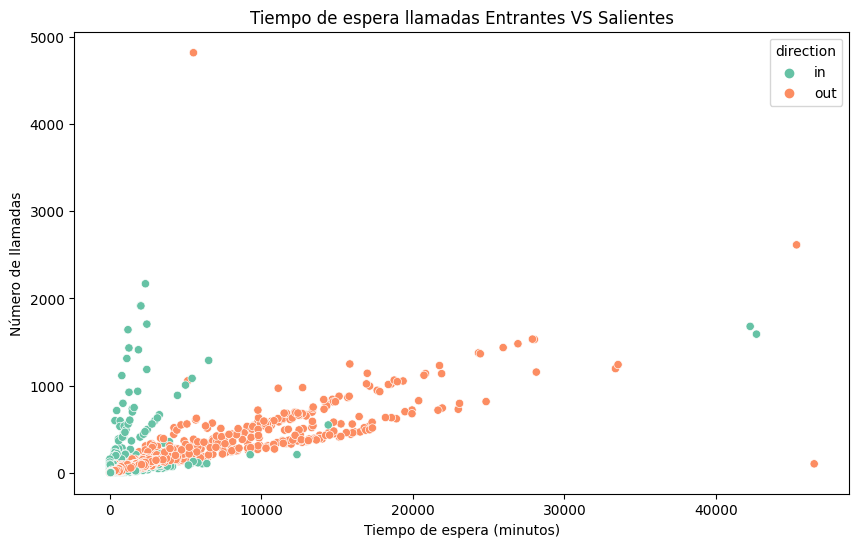

In [64]:
# Graficamos el tiempo de espera
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='waiting_time', y='calls_count', hue='direction', palette='Set2')
# Agregamos etiquetas y titulo
plt.title("Tiempo de espera llamadas Entrantes VS Salientes")
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel("Número de llamadas")
#plt.xticks(rotation=45)
plt.show()

En el grafico podemos observar las llamadas entrantes tienen menos tiempo de espera, en comparación las llamadas salientes tienen un tiempo de espera prolongado. También podemos decir que una parte importante de las llamadas realizadas tanto entrantes como las salientes se concentra en los primeros minutos del tiempo de espera.

In [65]:
# Buscamos a los operadores que tienen más llamadas perdidas
missed_calls_by_operator = data.groupby('operator_id')['is_missed_call'].sum().reset_index()
missed_calls_by_operator= missed_calls_by_operator.sort_values(ascending=False, by='is_missed_call')
print(missed_calls_by_operator.head())

     operator_id  is_missed_call
0         800000            7343
79        891410             119
29        885876             115
80        891414             113
204       901880             111


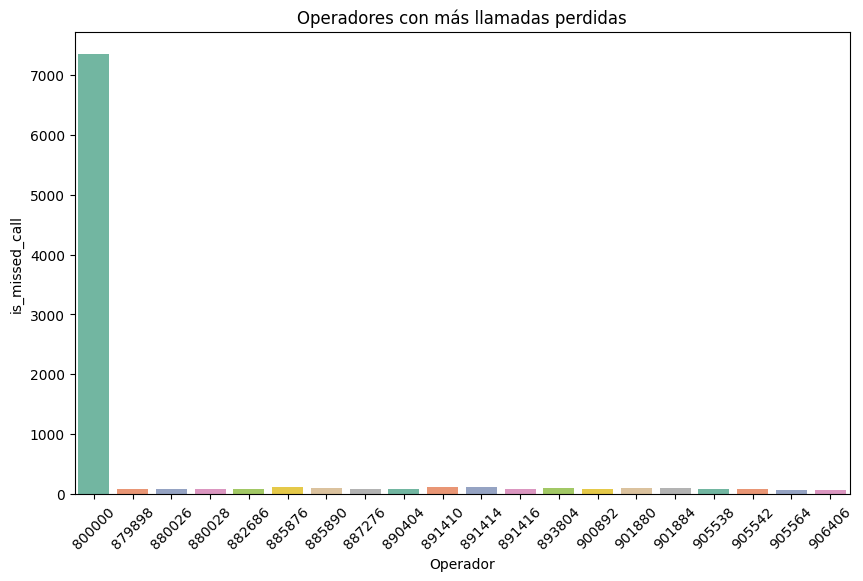

In [66]:
# Graficamos las llamadas perdidas
plt.figure(figsize=(10, 6))
sns.barplot(data=missed_calls_by_operator.head(20), x='operator_id', y='is_missed_call', palette='Set2')
# Agregamos titulo y etiqueta
plt.title("Operadores con más llamadas perdidas")
plt.xlabel('Operador')
plt.xticks(rotation=45)
plt.show()

En estre grafico un dato destaca de todos, el operador con el valor ausente al que se agregó como "800000", tiene la mayor cantidad de llamadas perdidas en comparación con los demás operadores quienes no superan las 120 llamadas perdidas.

In [67]:
# Buscamos a los operadores con la promedio mayor de tiempo de espera
waiting_time_by_operator = data.groupby('operator_id')['waiting_time'].mean().reset_index()
waiting_time_by_operator = waiting_time_by_operator.sort_values(ascending=False, by='waiting_time')
print(waiting_time_by_operator.head())

     operator_id  waiting_time
552       925922   5805.027397
30        885890   5703.565217
584       929428   5478.123077
29        885876   4838.459364
318       908640   3537.860465


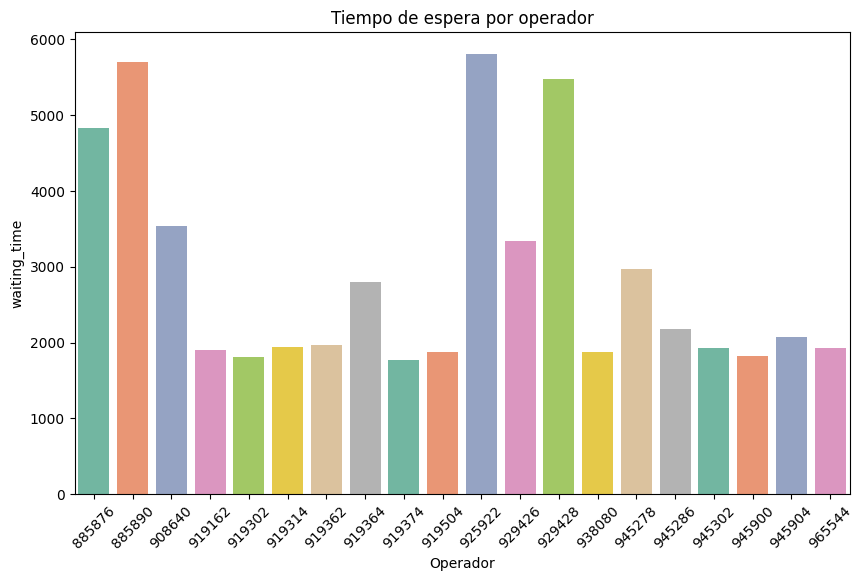

In [68]:
# Graficamos el promedio de tiempo de espera de cada operador
plt.figure(figsize=(10, 6))
sns.barplot(data=waiting_time_by_operator.head(20), x='operator_id', y='waiting_time', palette='Set2')
# Agregamos titulo y etiquetas
plt.title('Tiempo de espera por operador')
plt.xlabel('Operador')
plt.xticks(rotation=45)
plt.show()

Como se puede observar en la gráfica el tiempo de esperada del operador "925922" es la máxima, con un promedio menor pero no alejado del más alto están los operadores "885890", "929428" y "885876". También existen operadores que no superan la media de 2000 como el operador "919374" y otros.

In [69]:
# Buscamos a los operadores con menor número de llamadas salientes
outgoing_calls_by_operator = data[data['direction'] == 'out'].groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls_by_operator = outgoing_calls_by_operator.sort_values(ascending=True, by='calls_count')
print(outgoing_calls_by_operator.head())

     operator_id  calls_count
217       906076            1
783       954284            1
606       939698            1
782       954086            1
842       963716            1


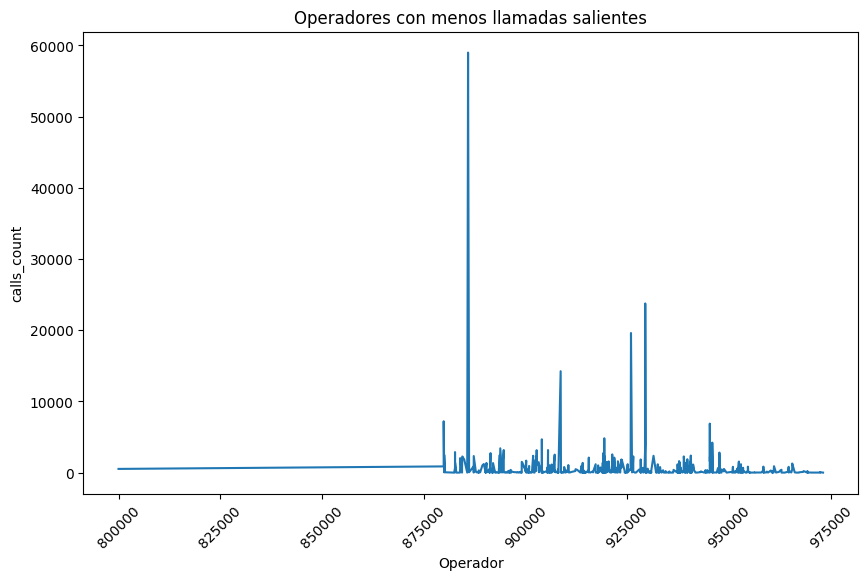

In [70]:
# Graficamos a los operadores con un número menor de llamadas salientes
plt.figure(figsize=(10, 6))
sns.lineplot(data=outgoing_calls_by_operator, x='operator_id', y='calls_count', palette='Set2')
# Agregamos titulo y etiquetas
plt.title('Operadores con menos llamadas salientes')
plt.xlabel('Operador')
plt.xticks(rotation=45)
plt.show()

In [71]:
# Buscamos cuantos operadores realizaron una llamada
operators_with_one_call = outgoing_calls_by_operator[outgoing_calls_by_operator['calls_count'] == 1]
print('Operadores que solo realizaron una llamada', operators_with_one_call.nunique())
print(operators_with_one_call.head())

Operadores que solo realizaron una llamada operator_id    61
calls_count     1
dtype: int64
     operator_id  calls_count
217       906076            1
783       954284            1
606       939698            1
782       954086            1
842       963716            1


En la grafica podemos observar a dos operadores que tienen una cantidad alta de operadores que solo han realizado una llamada saliente. Otra parte consederable de operadores si reliza llamadas salientes. Además 61 operadores solo realizaron una llamada.

In [72]:
# Combinamos las metricas para obtener un DataFrame
operator_metrics = missed_calls_by_operator.merge(waiting_time_by_operator, on='operator_id').merge(outgoing_calls_by_operator, on='operator_id')
print(operator_metrics.head())

   operator_id  is_missed_call  waiting_time  calls_count
0       800000            7343    170.209898          521
1       891410             119    128.655172         2737
2       885876             115   4838.459364        58437
3       891414             113     92.000000         2498
4       901880             111    166.811258         2362


In [73]:
# Mostramos las estadístocas de las metricas
operator_metrics.describe()

,operator_id,is_missed_call,waiting_time,calls_count
count,883.000000,883.000000,883.000000,883.000000
mean,925516.031710,24.218573,259.290077,689.540204
std,23237.603272,247.328192,554.962312,3121.188227
min,800000.000000,0.000000,0.000000,1.000000
25%,906393.000000,2.000000,25.928571,11.000000
50%,924958.000000,9.000000,57.315789,90.000000
75%,943442.000000,22.000000,212.401609,591.500000
max,973120.000000,7343.000000,5805.027397,58977.000000


Usamos la media de las métricas para usarlas como punto de referencia y así conocer a los operadores que son ineficaces. La media de las llamadas perdidas es 24, la media del tiempo de espero es de 259 y la media de las llamadas realizadas es de 689.

In [74]:
# Función para identificar a los operadores ineficaces
def inefficient_operators(operator_metrics):
    # Filtrar los operadores con las medias de las métricas obtenidas
    inefficient = operator_metrics[
        (operator_metrics['is_missed_call'] > 24) &
        (operator_metrics['waiting_time'] > 259) &
        (operator_metrics['calls_count'] < 689)
    ]
    # Se regresará una lista de los operadores que cumplan con las métricas 
    return inefficient['operator_id'].tolist()

ineffective_list = inefficient_operators(operator_metrics)

print('Operadores ineficaces:', ineffective_list)

Operadores ineficaces: [913942, 913938]


Como podemos ver la función arroja a dos id de los operadores que a través de las méticas se consideran como operadores ineficaces.

## Prueba de hipótesis
<a id="Prueba de hipótesis"></a>

**Hipótesis nula:** El tiempo de espera de las llamadas salientes que realizan los operadores es diferente para las llamadas entrantes.

**Hipótesis alternativa:** El tiempo de espera de las llamadas salientes que realizan los operadores no es diferente para las llamadas entrantes.

In [75]:
# Preparamos los datos para la hipótesis
test_group_calls_in =  data[data['direction'] == 'in']
test_group_calls_out = data[data['direction'] == 'out']
test_group_in = test_group_calls_in.groupby('direction')['waiting_time'].sum()
test_group_out = test_group_calls_out.groupby('direction')['waiting_time'].sum()

In [76]:
# Hacemos la prueba de hipótesis 

alpha = 0.05 # significancia estadística

results_1 = st.mannwhitneyu(test_group_in, test_group_out, alternative='two-sided')

print('valor p: ', results_1.pvalue) 

if results_1.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.0
No podemos rechazar la hipótesis nula


No podemos rechar la hipótesis de que el tiempo de espera para las llamadas entrantes es diferente para las llamadas salientes.

**Hipótesis nula:** El tiempo de espera para las llamadas que realizan los operadores es diferente para el plan de tarifa B y C.

**Hipótesis alternativa:** El tiempo de espera para las llamadas que realizan los operadores no es diferente para el plan de tarifa B y C.

In [77]:
# Unimos los datos de los datasets data y clients
merged_data = pd.merge(data, clients, on='user_id')
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,800000,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25,B,2019-08-01


In [78]:
# Agrupamos los datos de las columnas que necesitamos para la prueba de hipótesis
test_group = merged_data.groupby(['operator_id', 'tariff_plan'])['waiting_time'].sum().reset_index()
print(test_group.head())

   operator_id tariff_plan  waiting_time
0       800000           A        426367
1       800000           B        437500
2       800000           C        405218
3       879896           B         12275
4       879898           B        103897


In [79]:
# Preparamos los datos para la hipótesis
group_b = test_group[test_group['tariff_plan']== 'B']
group_c = test_group[test_group['tariff_plan']== 'C']
test_group_b = group_b.groupby('operator_id')['waiting_time'].sum()
test_group_c = group_c.groupby('operator_id')['waiting_time'].sum()

In [80]:
# Prueba de hipótesis
alpha = 0.05  # significancia estadística

results = st.ttest_ind(test_group_b, test_group_c, equal_var= False)

print('valor p: ', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.4770483234812346
No podemos rechazar la hipótesis nula


No podemos rechazar la hipótesis de que el tiempo de espera para las llamadas que realizan los operadores es diferente para el plan de tarifa B y C.

## Conclusiones
<a id="Conclusiones"></a>

Después de realizar el análisis de los datos, podemos decir que los operadores ineficaces pueden ser diferentes con forme a las métricas utilizadas, algunos son conciderados ineficaces en el tiempo de espera pero no en las llamadas salientes realizadas. 

Por ejemplo: 

**Operadores con más llamadas perdidas:** fueron el "800000", "891410" y "885876".

**Operadores con más tiempo de espera:** fueron "925922", "885890" y "929428".

**Operadores con menos llamadas salientes:** fueron "906076", "954284" y "939698". 

Al momento de utilizar la función para identificar a los operadores ineficaces se obtuvo: 

**Operadores ineficaces:** fueron el "913942" y el "913938".

De acuerdo a los resultados obtenidos de las méticas utilizadas para conocer a los operadores ineficaces podemos ver que los id de los operadores sen diferentes en cada una de las métricas, al final solo se obtuvieron dos operadores que de acuerdo a las méticas establecidas son conciderados como operadores ineficaces.